In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#create file and read in csv 
file_path = "mxmh_survey_results.csv"
mental_health_data_df = pd.read_csv(file_path)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
mental_health_data_df['Primary streaming service'].fillna(value='N/A', inplace=True)
mental_health_data_df['BPM'].fillna(value= -1, inplace=True)
mental_health_data_df['Music effects'].fillna(value='N/A', inplace=True)
mental_health_data_df['While working'].fillna(value='N/A', inplace=True)
del mental_health_data_df['Instrumentalist']
del mental_health_data_df['Foreign languages']
del mental_health_data_df['Composer']
del mental_health_data_df['Permissions']

In [4]:
mental_health_data_df = mental_health_data_df.dropna(how='any')
mental_health_data_df.head()
mental_health_data_df_40_under = mental_health_data_df[mental_health_data_df['Age'] < 40].copy()
mental_health_data_df_40_under_pt2 = mental_health_data_df_40_under.copy()

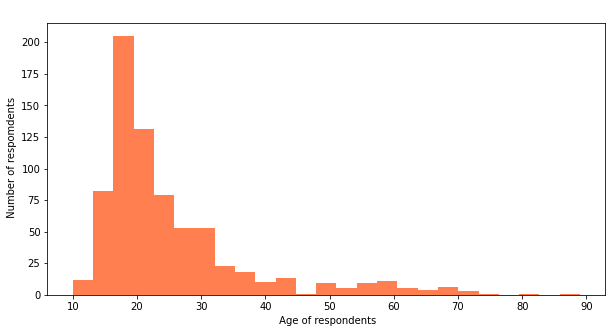

In [5]:
respodents_age_count = mental_health_data_df.hist(['Age'], bins = 25, color ='coral', grid=False, figsize = (10, 5), label = None)
plt.xlabel(" Age of respondents")
plt.ylabel(" Number of respomdents")
plt.title (" ")
plt.savefig ("Output/respodents_age_count", bbox_inches='tight')
plt.show()

Exploring the relationship between age groups and self-reported level of mental illness severity. 

In [6]:
#age bins
age_bins = [10,19,29,39]
age_labels = ["Teenage(10-19)", "Young adults(20-29)", "Adults(30-39)"]
#add age bins
mental_health_data_df_40_under['Age group'] = pd.cut(mental_health_data_df_40_under['Age'], age_bins, labels=age_labels)
mental_health_data_df_40_under.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age group
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,Teenage(10-19)
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132.0,Never,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,Teenage(10-19)
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107.0,Never,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,Teenage(10-19)
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,Teenage(10-19)
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,Teenage(10-19)


In [7]:
mental_health_data_df_40_under_copy = mental_health_data_df_40_under.copy()
mental_health_data_df_40_under.set_index('Age group', inplace=True)
mental_health_data_df_40_under.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
Age group,,,,,,,,,,,,,,,,,,,,,
Teenage(10-19),8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A
Teenage(10-19),8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132.0,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
Teenage(10-19),8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107.0,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
Teenage(10-19),8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
Teenage(10-19),8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [8]:
generation_groups = mental_health_data_df_40_under.groupby('Age group')
mean_by_generation = generation_groups.mean()
del mean_by_generation['Age']
del mean_by_generation['Hours per day']
del mean_by_generation['BPM']
mean_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
Teenage(10-19),5.833893,4.442953,3.619128,2.721477
Young adults(20-29),6.195652,5.492754,3.641304,2.768116
Adults(30-39),6.097561,5.219512,4.621951,2.939024


In [9]:
median_by_generation = generation_groups.median()
del median_by_generation['Age']
del median_by_generation['Hours per day']
del median_by_generation['BPM']
median_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
Teenage(10-19),6.0,5.0,3.0,2.0
Young adults(20-29),7.0,6.0,3.0,2.0
Adults(30-39),7.0,6.0,5.0,2.0


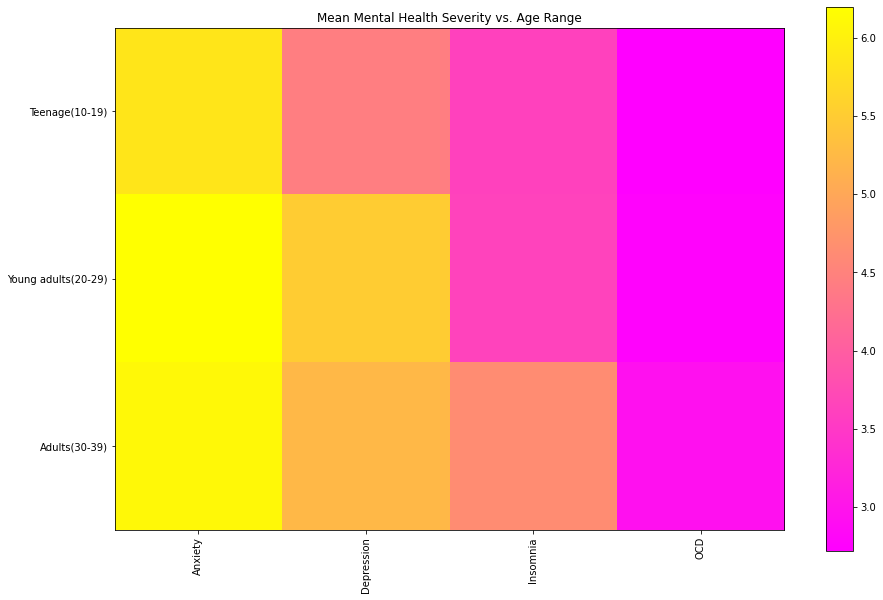

In [10]:
mental_illness_labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig, ax = plt.subplots(figsize=(15,10))
#create heat map
mean_im = ax.imshow(mean_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(mean_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)

# display plot
plt.title('Mean Mental Health Severity vs. Age Range')
plt.savefig('Output/Mean_heat.png')
plt.show()

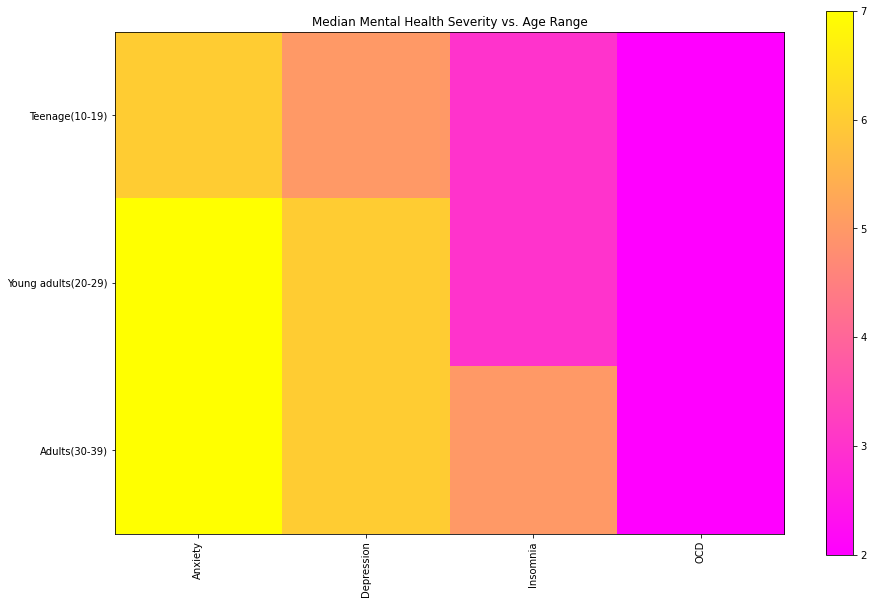

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
#create heat map
median_im = ax.imshow(median_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(median_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)
# display plot
plt.title('Median Mental Health Severity vs. Age Range')
plt.savefig('Output/Median_heat.png')
plt.show()

In [12]:
#create tempo bins
tempo_bins = [0, 76, 120, 700]
tempo_labels = ['Slow', 'Medium', 'Fast']
#create tempo data frame, there is one extraneous value of some grossly high value that no song could feasibly be
tempo_df = mental_health_data_df[mental_health_data_df['BPM'] <701].copy()
tempo_df['Tempo'] = pd.cut(mental_health_data_df['BPM'], tempo_bins, labels=tempo_labels,)

In [13]:
tempo_median = tempo_df.groupby('Tempo')
tempo_median = tempo_median.median()
del tempo_median['Age']
del tempo_median['Hours per day']
del tempo_median['BPM']
tempo_median.head()

,Anxiety,Depression,Insomnia,OCD
Tempo,,,,
Slow,7.0,6.0,2.0,2.0
Medium,6.0,5.0,3.0,2.0
Fast,6.0,5.0,4.0,2.0


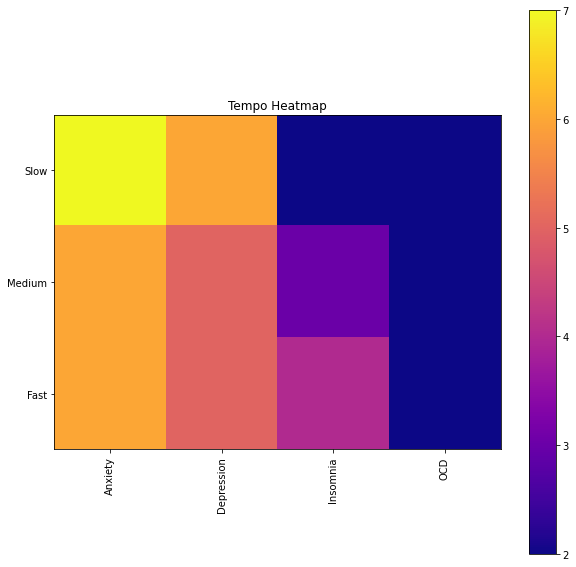

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
#create heatmap
tempo_median_im = ax.imshow(tempo_median, cmap='plasma')
#add colour bar
tempo_cbar = ax.figure.colorbar(tempo_median_im, ax=ax)
#add labels 
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(tempo_labels)))
ax.set_yticklabels(tempo_labels)
#display plot
plt.title('Tempo Heatmap')
plt.savefig('Output/Tempo_heat.png')
plt.show()

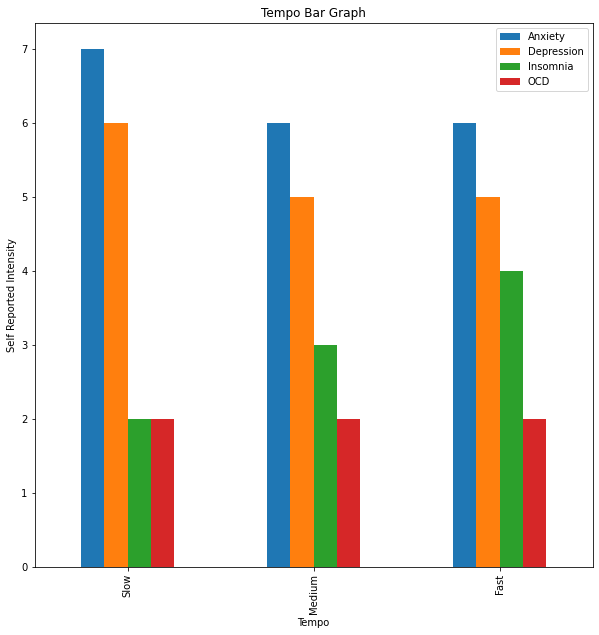

In [15]:
tempo_median.plot(kind='bar', figsize=(10,10))
plt.title('Tempo Bar Graph')
plt.ylabel('Self Reported Intensity')
plt.savefig('Output/Tempo_Bar.png')
plt.show()

The r value for Anxiety: 0.029758071172333974


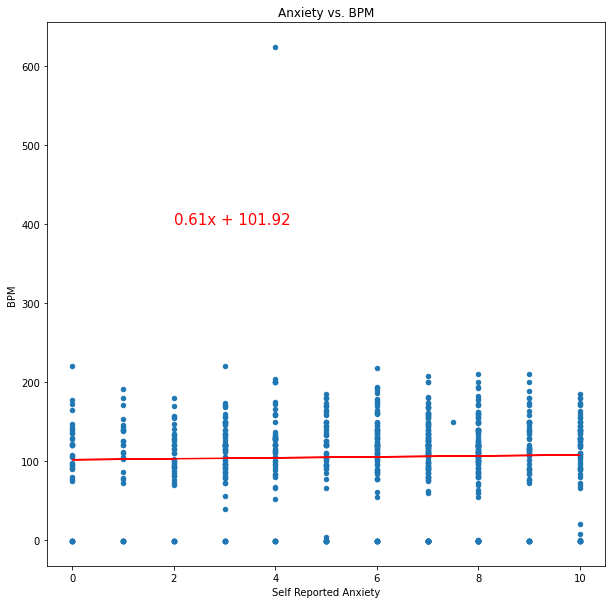

In [16]:
tempo_df.plot(kind ='scatter', x = 'Anxiety', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported Anxiety')
plt.ylabel('BPM')
plt.title('Anxiety vs. BPM')
(anx_slope, anx_int, anx_r, anx_p, anx_std_err) = st.linregress(tempo_df['Anxiety'], tempo_df['BPM'])
anx_regress = tempo_df['Anxiety']*anx_slope + anx_int
anx_line = f'{round(anx_slope, 2)}x + {round(anx_int, 2)}'
plt.plot(tempo_df['Anxiety'], anx_regress, 'r-')
plt.annotate(anx_line, (2,400), fontsize=15, color='red')
print(f'The r value for Anxiety: {anx_r}')
plt.savefig('Output/Anxiety.png')
plt.show()

The r value for OCD: -0.0026174526065235277


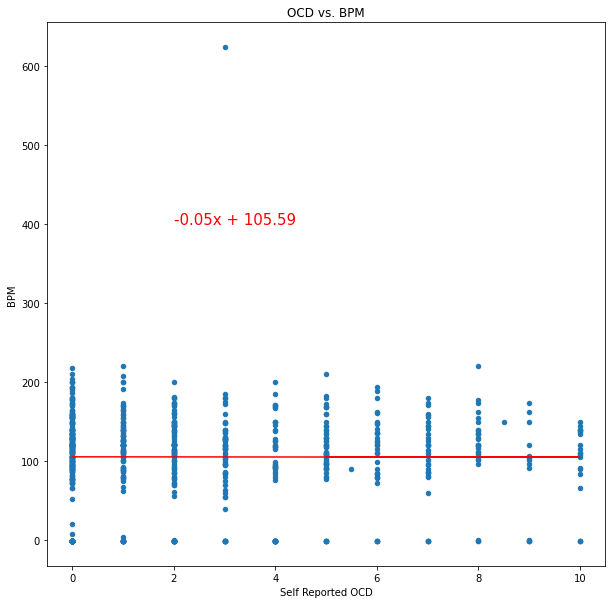

In [17]:
tempo_df.plot(kind ='scatter', x = 'OCD', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported OCD')
plt.ylabel('BPM')
plt.title('OCD vs. BPM')
(ocd_slope, ocd_int, ocd_r, ocd_p, ocd_std_err) = st.linregress(tempo_df['OCD'], tempo_df['BPM'])
ocd_regress = tempo_df['OCD']*ocd_slope + ocd_int
ocd_line = f'{round(ocd_slope, 2)}x + {round(ocd_int, 2)}'
plt.plot(tempo_df['OCD'], ocd_regress, 'r-')
plt.annotate(ocd_line, (2,400), fontsize=15, color='red')
print(f'The r value for OCD: {ocd_r}')
plt.savefig('Output/OCD.png')
plt.show()

The r value for Insomnia: 0.05514467687412621


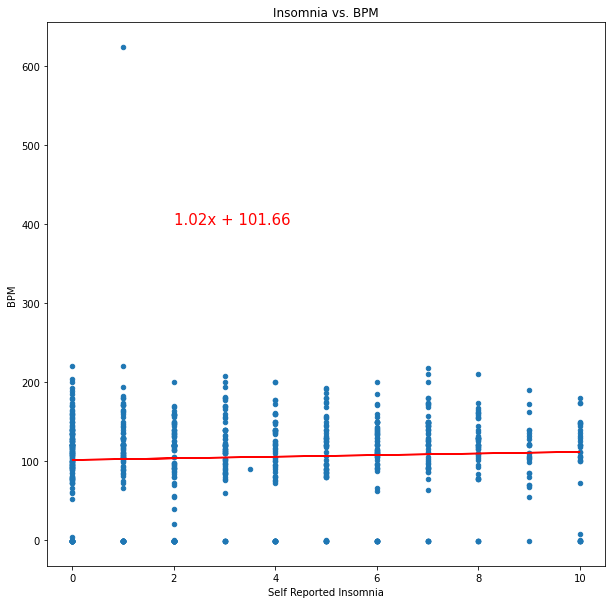

In [18]:
tempo_df.plot(kind ='scatter', x = 'Insomnia', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported Insomnia')
plt.ylabel('BPM')
plt.title('Insomnia vs. BPM')
(ins_slope, ins_int, ins_r, ins_p, ins_std_err) = st.linregress(tempo_df['Insomnia'], tempo_df['BPM'])
ins_regress = tempo_df['Insomnia']*ins_slope + ins_int
ins_line = f'{round(ins_slope, 2)}x + {round(ins_int, 2)}'
plt.plot(tempo_df['Insomnia'], ins_regress, 'r-')
plt.annotate(ins_line, (2,400), fontsize=15, color='red')
print(f'The r value for Insomnia: {ins_r}')
plt.savefig('Output/Insomnia.png')
plt.show()

The r value for Depression: 0.07533450012590873


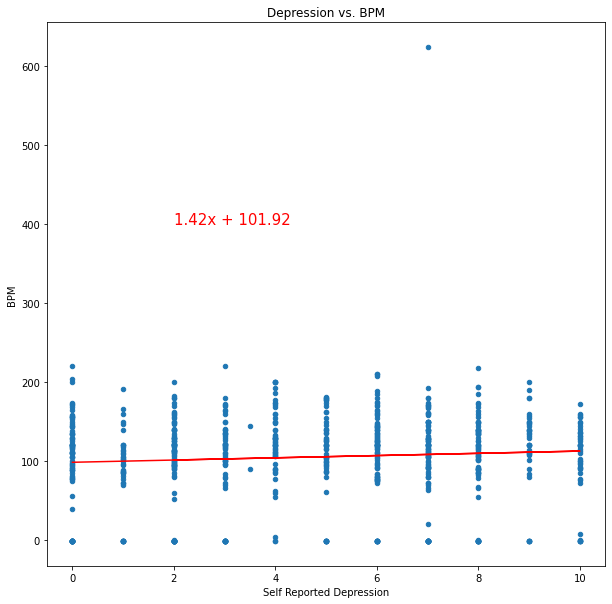

In [19]:
tempo_df.plot(kind ='scatter', x = 'Depression', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported Depression')
plt.ylabel('BPM')
plt.title('Depression vs. BPM')
(dep_slope, dep_int, dep_r, dep_p, dep_std_err) = st.linregress(tempo_df['Depression'], tempo_df['BPM'])
dep_regress = tempo_df['Depression']*dep_slope + dep_int
dep_line = f'{round(dep_slope, 2)}x + {round(anx_int, 2)}'
plt.plot(tempo_df['Depression'], dep_regress, 'r-')
plt.annotate(dep_line, (2,400), fontsize=15, color='red')
print(f'The r value for Depression: {dep_r}')
plt.savefig('Output/Depression.png')
plt.show()

In [20]:
mental_health_data_df_40_under_pt2["Combined Scale"] = mental_health_data_df_40_under_pt2["Anxiety"]+mental_health_data_df_40_under_pt2["Depression"]+mental_health_data_df_40_under_pt2["Insomnia"]+mental_health_data_df_40_under_pt2["OCD"]

mental_health_data_df_40_under_pt2.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Combined Scale
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,4.0
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132.0,Never,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,26.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107.0,Never,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,23.0
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,30.0
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,18.0


In [21]:
# Slice the data and place it into bins
mental_health_data_df_40_under_pt2["Age groups"] = pd.cut(mental_health_data_df_40_under_pt2["Age"], bins=age_bins,labels=age_labels, include_lowest=True)
mental_health_data_df_40_under_pt2["Age groups"].value_counts()

Teenage(10-19)         299
Young adults(20-29)    276
Adults(30-39)           82
Name: Age groups, dtype: int64

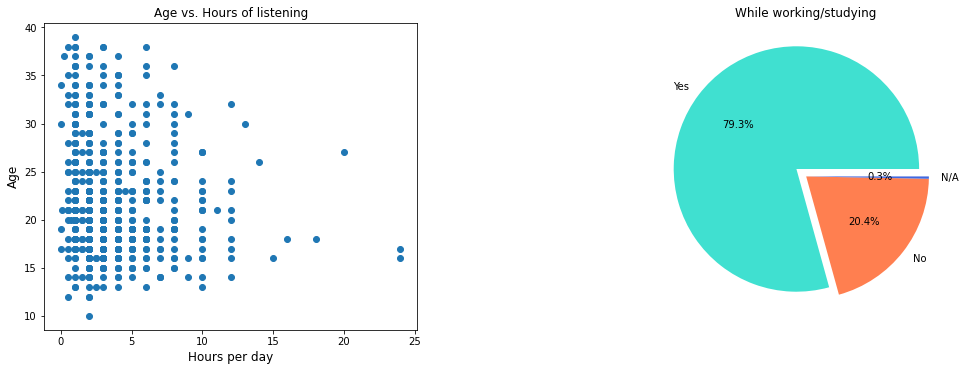

In [22]:
x = mental_health_data_df_40_under_pt2["Hours per day"]
y = mental_health_data_df_40_under_pt2["Age"]
z= mental_health_data_df_40_under_pt2["While working"].value_counts()

fig,(ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(w_pad =5)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.scatter(x,y)
ax1.set_xlabel('Hours per day', fontsize =12)
ax1.set_ylabel('Age', fontsize =12)
ax1.set_title('Age vs. Hours of listening', fontsize =12)

labels=mental_health_data_df_40_under_pt2["While working"].unique()
ax2.pie(z, labels = labels, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax2.title.set_text('While working/studying')
plt.savefig("Output/Age_ Hrs_of_listening_to_music.png", bbox_inches='tight')
plt.show()

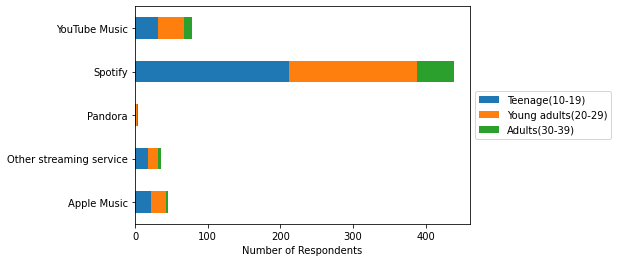

In [23]:
Teenage_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Age groups"] == "Teenage(10-19)" ,:])
Primary_streaming_services_teenage =Teenage_df["Primary streaming service"].value_counts()

Young_adults_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Age groups"] == "Young adults(20-29)" ,:])
Primary_streaming_services_young_adults =Young_adults_df["Primary streaming service"].value_counts()

Adults_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Age groups"] == "Adults(30-39)" ,:])
Primary_streaming_services_adults =Adults_df["Primary streaming service"].value_counts()

Primary_streaming_services_df = pd.DataFrame({
    "Teenage(10-19)": Primary_streaming_services_teenage,
    "Young adults(20-29)": Primary_streaming_services_young_adults,
    "Adults(30-39)": Primary_streaming_services_adults})

Primary_streaming_services_df_updated = Primary_streaming_services_df.drop(['I do not use a streaming service.','N/A'])


ax = Primary_streaming_services_df_updated.plot.barh(stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("")
ax.set_xlabel("Number of Respondents")
plt.savefig('Output/Primary_Streaming_services.png', bbox_inches='tight')
plt.show()

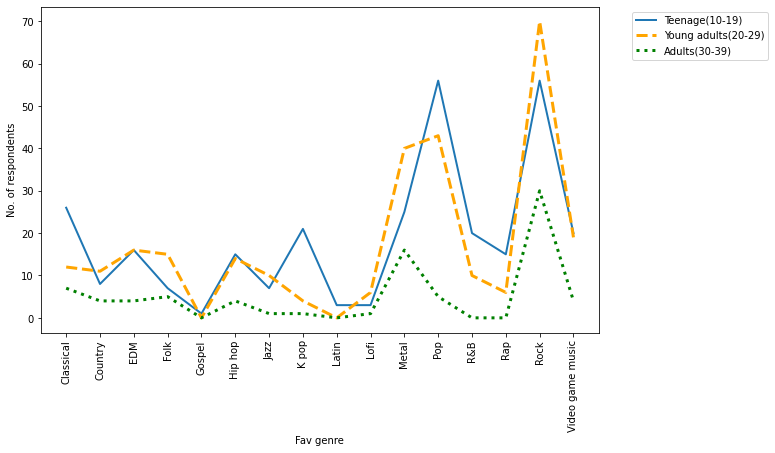

In [24]:
Teenage_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Age groups"] == "Teenage(10-19)" ,:])
Fav_genre_teenage =Teenage_df["Fav genre"].value_counts()

Young_adults_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Age groups"] == "Young adults(20-29)" ,:])
Fav_genre_young_adults =Young_adults_df["Fav genre"].value_counts()

Adults_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Age groups"] == "Adults(30-39)" ,:])
Fav_genre_adults =Adults_df["Fav genre"].value_counts()

Fav_genre_df = pd.DataFrame({
    "Teenage(10-19)": Fav_genre_teenage,
    "Young adults(20-29)": Fav_genre_young_adults,
    "Adults(30-39)": Fav_genre_adults})

Fav_genre_df['Teenage(10-19)'].fillna(value=0, inplace=True)
Fav_genre_df['Young adults(20-29)'].fillna(value=0, inplace=True)
Fav_genre_df['Adults(30-39)'].fillna(value=0, inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(Fav_genre_df['Teenage(10-19)'], color="tab:blue", linewidth=2, label = "Teenage(10-19)" )
plt.plot(Fav_genre_df['Young adults(20-29)'], linestyle = '--', color="orange", linewidth=3 ,label = "Young adults(20-29)")
plt.plot(Fav_genre_df['Adults(30-39)'], linestyle = 'dotted',  color="green", linewidth=3, label = "Adults(30-39)")
plt.xlabel("Fav genre")
plt.ylabel("No. of respondents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.savefig("Output/Fav_genre_by_Age_group.png" , bbox_inches='tight')
plt.show()

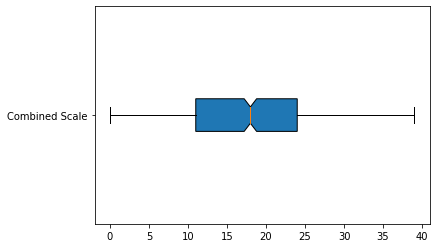

In [25]:
Combined_MH_rankings = mental_health_data_df_40_under_pt2["Combined Scale"]
fig1, ax1 = plt.subplots()
ax1.boxplot(Combined_MH_rankings ,notch =True, vert = False, patch_artist = True, labels = ["Combined Scale"])

plt.savefig("Output/Combined_Score.png", bbox_inches='tight')
plt.show()

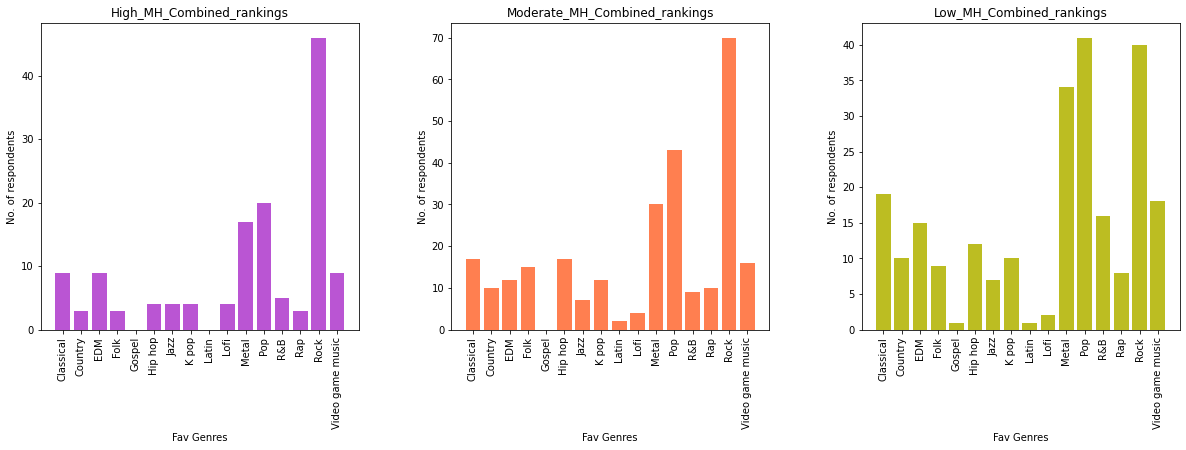

In [65]:
High_MH_rankings_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Combined Scale"] >=25 ,:])
Fav_genre_High_MH =High_MH_rankings_df["Fav genre"].value_counts()

Moderate_MH_rankings_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[(mental_health_data_df_40_under_pt2["Combined Scale"] <25)&(mental_health_data_df_40_under_pt2["Combined Scale"] >=15) ,:])
Fav_genre_Mod_MH =Moderate_MH_rankings_df["Fav genre"].value_counts()

Low_MH_rankings_df= pd.DataFrame(mental_health_data_df_40_under_pt2.loc[mental_health_data_df_40_under_pt2["Combined Scale"] <15 ,:])
Fav_genre_Low_MH =Low_MH_rankings_df["Fav genre"].value_counts()

Fav_genre_MH_df = pd.DataFrame({
    "High_MH_rankings": Fav_genre_High_MH,
    "Moderate_MH_rankings": Fav_genre_Mod_MH,
    "Low_MH_rankings": Fav_genre_Low_MH})

Fav_genre_MH_df['High_MH_rankings'].fillna(value=0, inplace=True)
Fav_genre_MH_df['Moderate_MH_rankings'].fillna(value=0, inplace=True)
Fav_genre_MH_df['Low_MH_rankings'].fillna(value=0, inplace=True)



fig,(ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(w_pad =0)
fig.set_figheight(5)
fig.set_figwidth(18)



x_axis = np.arange(len(mental_health_data_df_40_under_pt2["Fav genre"].unique()))
tick_locations=[value for value in x_axis]

for x in x_axis:
    tick_locations.append(x)

y0 = Fav_genre_MH_df["High_MH_rankings"]
y1 = Fav_genre_MH_df["Moderate_MH_rankings"]
y2 = Fav_genre_MH_df["Low_MH_rankings"]

xticklabels= mental_health_data_df_40_under_pt2["Fav genre"].unique()
xticklabels.sort()

ax1.bar(x_axis, y0, color ='mediumorchid')
ax1.set_xlabel( "Fav Genres")
ax1.set_ylabel( "No. of respondents")
ax1.set_title ("High_MH_Combined_rankings" )

ax1.set_xticks(range(len(xticklabels)))
ax1.set_xticklabels(xticklabels, rotation='vertical')


ax1.set_xticklabels(xticklabels, rotation = "vertical")

ax2.bar(x_axis, y1, color ='coral')
ax2.set_xlabel( "Fav Genres")
ax2.set_ylabel( "No. of respondents")
ax2.set_title ("Moderate_MH_Combined_rankings" )
ax2.set_xticks(range(len(xticklabels)))
ax2.set_xticklabels(xticklabels, rotation='vertical')
ax2.set_xticklabels(xticklabels, rotation = "vertical")

ax3.bar(x_axis, y2, color ='tab:olive')
ax3.set_xlabel( "Fav Genres")
ax3.set_ylabel( "No. of respondents")
ax3.set_title ("Low_MH_Combined_rankings" )
ax3.set_xticks(range(len(xticklabels)))
ax3.set_xticklabels(xticklabels, rotation='vertical')
ax3.set_xticklabels(xticklabels, rotation = "vertical")

plt.savefig("Output/Fav_genere_combined_rankings.png" , bbox_inches='tight')

plt.show()

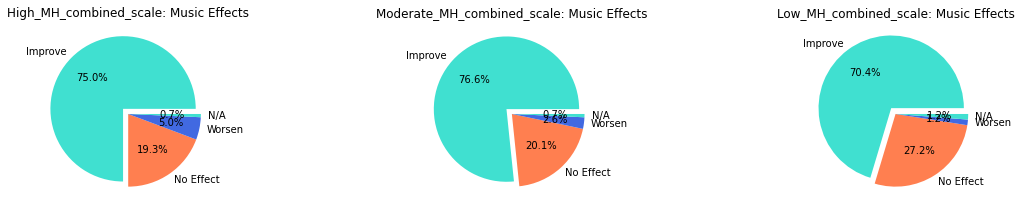

In [27]:
Music_effects_High_MH =High_MH_rankings_df["Music effects"].value_counts()
Music_effects_Mod_MH =Moderate_MH_rankings_df["Music effects"].value_counts()
Music_effects_Low_MH =Low_MH_rankings_df["Music effects"].value_counts()


x = Music_effects_High_MH
y = Music_effects_Mod_MH
z= Music_effects_Low_MH


fig,(ax1, ax2, ax3) = plt.subplots(1,3)

fig.tight_layout(w_pad =5)
fig.set_figheight(15)
fig.set_figwidth(15)

labels = ["Improve", "No Effect", "Worsen", "N/A"]

ax1.pie(x, labels = labels, explode = [0.1,0,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax1.title.set_text("High_MH_combined_scale: Music Effects")


ax2.pie(y, labels = labels, explode = [0.1,0,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax2.title.set_text('Moderate_MH_combined_scale: Music Effects')


ax3.pie(z, labels = labels, explode = [0.1,0,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax3.title.set_text('Low_MH_combined_scale: Music Effects')

plt.savefig("Output/Music_Effects_MH.png", bbox_inches='tight')

plt.show()

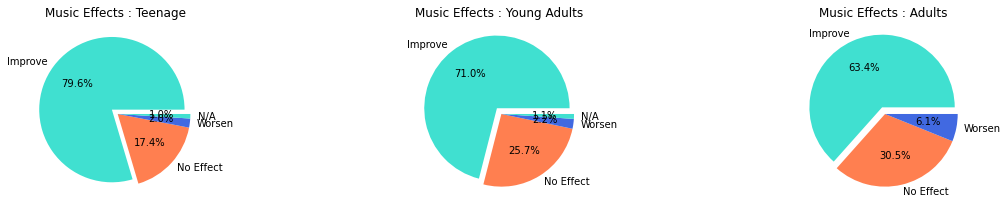

In [28]:
Music_effects_Teenage =Teenage_df["Music effects"].value_counts()
Music_effects_Young_Adults =Young_adults_df["Music effects"].value_counts()
Music_effects_Adults =Adults_df["Music effects"].value_counts()

a = Music_effects_Teenage
b = Music_effects_Young_Adults
c = Music_effects_Adults

fig,(ax4, ax5, ax6) = plt.subplots(1,3)
fig.tight_layout(w_pad =5)
fig.set_figheight(10)
fig.set_figwidth(15)

labels1 = ["Improve", "No Effect", "Worsen", "N/A"]

ax4.pie(a, labels = labels1, explode = [0.1,0,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax4.title.set_text("Music Effects : Teenage ")

ax5.pie(b, labels = labels1, explode = [0.1,0,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax5.title.set_text("Music Effects : Young Adults ")

labels2 = ["Improve", "No Effect", "Worsen"]
ax6.pie(c, labels = labels2, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax6.title.set_text("Music Effects : Adults ")

plt.savefig("Output/Music_Effects_Age_Group.png", bbox_inches='tight')

plt.show()

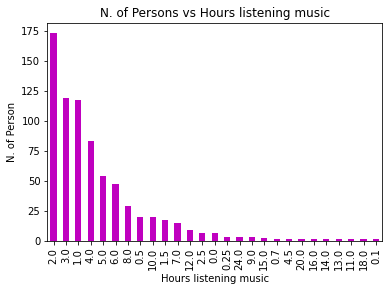

In [29]:
services = mental_health_data_df['Hours per day'].value_counts()
services.plot(kind='bar', color = "m")

plt.title('N. of Persons vs Hours listening music')
plt.xlabel("Hours listening music")
plt.ylabel("N. of Person")
plt.savefig("Output/Hours_listening.png")
plt.show()

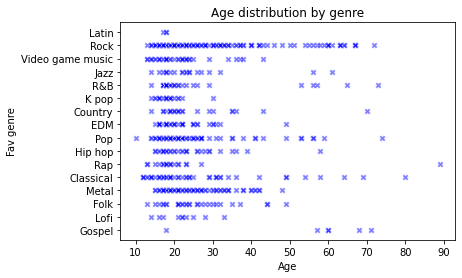

In [30]:
sns.scatterplot(data=mental_health_data_df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "blue")
plt.title('Age distribution by genre')
plt.savefig("Output/Scatter_fav_genre.png")
plt.show()
# **********EXTRA SEABORN

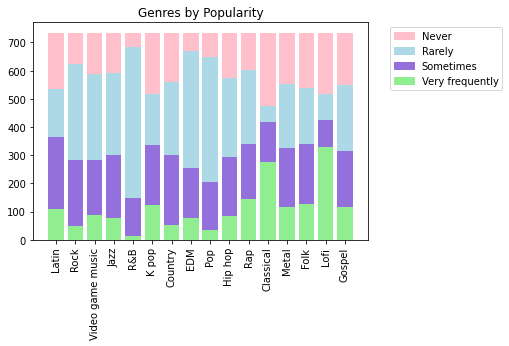

In [31]:
genre_all = mental_health_data_df['Fav genre'].unique()


i = 8

rarely_dist = []
sometimes_dist = []
never_dist = []
veryf_dist = []

while i != 27:
    freq_dist = mental_health_data_df.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    rarely_dist.append(freq_dist[0])
    sometimes_dist.append(freq_dist[1])
    never_dist.append(freq_dist[2])
    veryf_dist.append(freq_dist[3])  
    
    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    
    ax.bar(i, veryf_dist[i], label='Very frequently', color = "lightgreen") 
    
    ax.bar(i, sometimes_dist[i], label='Sometimes', bottom = veryf_dist[i], color = "mediumpurple")
        
    ax.bar(i, rarely_dist[i], label='Rarely', bottom = veryf_dist[i] + sometimes_dist[i], color = "lightblue")
    
    ax.bar(i, never_dist[i], label='Never', bottom=veryf_dist[i] + sometimes_dist[i] + rarely_dist[i], color = "pink")
    


    
ax.set_title('Genres by Popularity')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(genre_all)
plt.xticks(rotation = 90)

patch1 = mpatches.Patch(color='pink', label='Never')
patch2 = mpatches.Patch(color='lightblue', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='lightgreen', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left');
plt.savefig('Output/genre_by_popularity.png')
plt.show()

In [32]:
fillna_mode = lambda col: col.fillna(col.mode()[0])

mental_health_data_df_genre = mental_health_data_df.apply(fillna_mode)

In [33]:
mental_health_data_df_genre = mental_health_data_df.astype({
    'Age': 'int8',
    'Hours per day': 'float16',
    'While working': bool,
    'Exploratory': bool,
    'BPM': 'int16',
    'Frequency [Classical]': 'category',
    'Frequency [Country]': 'category',
    'Frequency [EDM]': 'category',
     'Frequency [Folk]': 'category',
     'Frequency [Gospel]': 'category',
     'Frequency [Hip hop]': 'category',
     'Frequency [Jazz]': 'category',
     'Frequency [K pop]': 'category',
     'Frequency [Latin]': 'category',
     'Frequency [Lofi]': 'category',
     'Frequency [Metal]': 'category',
     'Frequency [Pop]': 'category',
     'Frequency [R&B]': 'category',
     'Frequency [Rap]': 'category',
     'Frequency [Rock]': 'category',
     'Frequency [Video game music]': 'category',
     'Anxiety': 'int8',
     'Depression': 'int8',
     'Insomnia': 'int8',
     'OCD': 'int8',
     'Music effects': 'category'})

mental_health_data_df_genre.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,8/27/2022 19:29:02,18,Spotify,3.0,True,Latin,True,156,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,N/A
1,8/27/2022 19:57:31,63,Pandora,1.5,True,Rock,True,119,Sometimes,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,N/A
2,8/27/2022 21:28:18,18,Spotify,4.0,True,Video game music,True,132,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
3,8/27/2022 21:40:40,61,YouTube Music,2.5,True,Jazz,True,84,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
4,8/27/2022 21:54:47,18,Spotify,4.0,True,R&B,True,107,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve


In [34]:
# Carrying out the division of age brackets:
mental_health_data_df_genre['Age'] = pd.cut(mental_health_data_df_genre['Age'], bins=[9, 19, 59, 70],
                                 labels=['Teenager', 'Adults', 'Seniors'])

In [35]:
mental_health_data_df_genre['Age'].value_counts()

Adults      409
Teenager    299
Seniors      21
Name: Age, dtype: int64

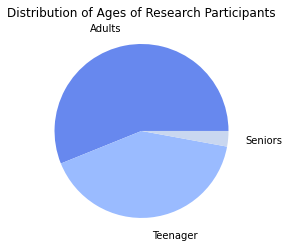

In [36]:
genre = mental_health_data_df_genre["Age"].value_counts()

genre.plot(kind='pie', labeldistance = 1.2, colors = sns.color_palette("coolwarm"))

plt.title('Distribution of Ages of Research Participants')
plt.ylabel("")
plt.savefig('Output/distribution_pie.png')
plt.show()

In [37]:
streaming_ages = ( mental_health_data_df_genre
    .groupby('Age')['Primary streaming service']
    .agg(['value_counts'])
    .reset_index()
    .rename(columns={'value_counts':'quantity'}))

streaming_ages.sample(10)

,Age,Primary streaming service,quantity
9,Adults,Other streaming service,29
11,Adults,Pandora,4
8,Adults,I do not use a streaming service.,50
1,Teenager,YouTube Music,31
16,Seniors,Other streaming service,3
4,Teenager,I do not use a streaming service.,15
13,Seniors,Pandora,5
14,Seniors,YouTube Music,5
18,Seniors,Apple Music,2
5,Teenager,Pandora,1


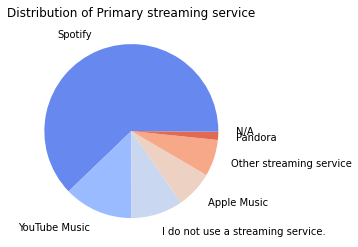

In [38]:
genre = mental_health_data_df_genre["Primary streaming service"].value_counts()

genre.plot(kind='pie', labeldistance = 1.2, colors = sns.color_palette("coolwarm"))

plt.title('Distribution of Primary streaming service')
plt.ylabel("")
plt.savefig('Output/Distribution_pie.png')
plt.show()

In [39]:
# Creating the dataset and viewing a sample:
rock_metal_data = (
    mental_health_data_df
    .query('`Fav genre` == "Metal" | `Fav genre` == "Rock"')
)

rock_metal_data.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
72,8/28/2022 14:01:08,16.0,Spotify,4.0,Yes,Rock,No,-1.0,Sometimes,Rarely,...,Very frequently,Rarely,Rarely,Very frequently,Very frequently,9.0,8.0,1.0,2.0,Improve
235,8/28/2022 22:39:58,31.0,Spotify,2.0,No,Metal,Yes,95.0,Sometimes,Sometimes,...,Very frequently,Rarely,Sometimes,Very frequently,Sometimes,7.0,6.0,6.0,5.0,Improve
477,9/1/2022 17:27:50,60.0,YouTube Music,2.0,Yes,Rock,No,132.0,Sometimes,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,4.0,4.0,2.0,0.0,Improve
103,8/28/2022 15:41:56,28.0,YouTube Music,1.0,No,Rock,Yes,120.0,Rarely,Never,...,Rarely,Never,Never,Sometimes,Rarely,6.0,6.0,2.0,0.0,No effect
449,9/1/2022 5:01:52,25.0,Spotify,4.0,Yes,Rock,Yes,-1.0,Sometimes,Rarely,...,Sometimes,Rarely,Sometimes,Very frequently,Very frequently,6.0,2.0,3.0,2.0,Improve
315,8/29/2022 4:53:44,17.0,Spotify,2.0,Yes,Rock,Yes,93.0,Never,Rarely,...,Very frequently,Sometimes,Sometimes,Very frequently,Sometimes,0.0,8.0,0.0,0.0,Improve
470,9/1/2022 16:35:30,63.0,Spotify,2.0,Yes,Rock,Yes,133.0,Very frequently,Sometimes,...,Never,Rarely,Never,Very frequently,Never,5.0,4.0,6.0,2.0,Improve
586,9/6/2022 14:43:07,23.0,I do not use a streaming service.,10.0,Yes,Metal,No,165.0,Never,Never,...,Never,Never,Never,Sometimes,Never,0.0,0.0,0.0,0.0,No effect
343,8/29/2022 9:01:49,23.0,Spotify,3.0,Yes,Rock,Yes,66.0,Rarely,Rarely,...,Very frequently,Very frequently,Sometimes,Very frequently,Never,10.0,7.0,0.0,10.0,Improve
649,9/13/2022 7:06:03,26.0,Spotify,3.0,No,Metal,Yes,140.0,Rarely,Very frequently,...,Rarely,Rarely,Sometimes,Very frequently,Rarely,1.0,3.0,10.0,0.0,No effect


In [40]:
genre_ages = (rock_metal_data.groupby('Age')['Fav genre'].agg(['value_counts']).reset_index()
              .rename(columns={'value_counts':'quantity'}))

genre_ages

,Age,Fav genre,quantity
0,13.0,Rock,1
1,14.0,Rock,3
2,15.0,Rock,6
3,15.0,Metal,2
4,16.0,Rock,12
...,...,...,...
67,61.0,Rock,1
68,63.0,Rock,3
69,64.0,Rock,2
70,67.0,Rock,3


In [41]:
# Checking the average age of listeners:
rock_mean_age = (
    rock_metal_data
    .groupby('Fav genre', as_index=False)[['Age']]
    .mean()
    .round()
)
rock_mean_age

,Fav genre,Age
0,Metal,25.0
1,Rock,28.0


In [42]:
# Grouping data to get mental conditions averages:
rock_means = (
       rock_metal_data
       .groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round(2))

rock_means

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Metal,5.76,5.07,4.56,2.40
Rock,6.12,5.24,3.88,2.68


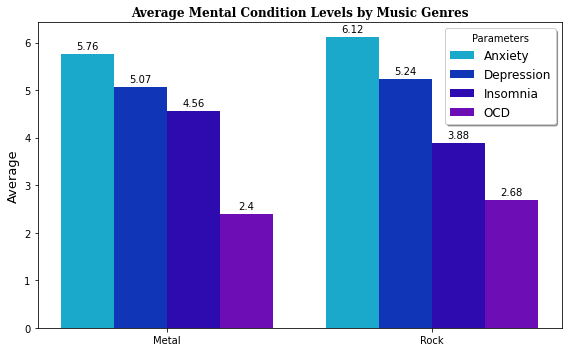

In [43]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:
labels = ['Metal', 'Rock']
anx_mean = rock_means["Anxiety"]
dep_mean = rock_means["Depression"]
ins_mean = rock_means["Insomnia"]
ocd_mean = rock_means["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels by Music Genres', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Metal', 'Rock'])
plt.legend(
    fontsize=12, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)
# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.savefig('Output/Rock.png')
plt.show()

In [44]:
# Creating the dataset and viewing a sample:
classical_data = (
    mental_health_data_df
    .query('`Fav genre` == "Classical"')
)

classical_data.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
34,8/28/2022 11:08:51,16.0,Spotify,1.0,Yes,Classical,No,75.0,Very frequently,Never,...,Never,Never,Never,Never,Rarely,0.0,0.0,0.0,0.0,No effect
418,8/30/2022 11:05:06,22.0,YouTube Music,3.0,No,Classical,Yes,113.0,Very frequently,Never,...,Rarely,Never,Never,Rarely,Never,8.0,2.0,4.0,0.0,No effect
348,8/29/2022 9:43:35,17.0,YouTube Music,6.0,Yes,Classical,Yes,120.0,Very frequently,Rarely,...,Very frequently,Never,Never,Never,Rarely,4.0,2.0,0.0,0.0,Improve
92,8/28/2022 14:49:18,24.0,Spotify,4.0,Yes,Classical,Yes,175.0,Very frequently,Rarely,...,Very frequently,Rarely,Never,Very frequently,Rarely,4.0,6.0,5.0,3.0,Improve
514,9/2/2022 5:40:14,64.0,YouTube Music,2.0,Yes,Classical,No,-1.0,Very frequently,Never,...,Very frequently,Rarely,Never,Rarely,Never,5.0,2.0,4.0,0.0,Improve
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Classical,No,170.0,Very frequently,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve
393,8/29/2022 19:08:34,13.0,Other streaming service,4.0,Yes,Classical,Yes,126.0,Very frequently,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,8.0,5.0,10.0,3.0,Improve
266,8/29/2022 0:47:59,31.0,Spotify,8.0,Yes,Classical,Yes,-1.0,Very frequently,Never,...,Never,Never,Never,Rarely,Rarely,5.0,7.0,5.0,4.0,Improve
390,8/29/2022 18:56:27,54.0,I do not use a streaming service.,6.0,Yes,Classical,No,-1.0,Very frequently,Sometimes,...,Sometimes,Sometimes,Rarely,Rarely,Never,2.0,2.0,3.0,2.0,Improve
385,8/29/2022 18:00:27,16.0,Other streaming service,3.0,Yes,Classical,No,72.0,Very frequently,Rarely,...,Very frequently,Never,Never,Never,Rarely,9.0,7.0,10.0,6.0,No effect


In [45]:
genre_ages_classical = (classical_data.groupby('Age')['Fav genre'].agg(['value_counts']).reset_index()
              .rename(columns={'value_counts':'quantity'}))

genre_ages_classical

,Age,Fav genre,quantity
0,12.0,Classical,3
1,13.0,Classical,2
2,14.0,Classical,4
3,15.0,Classical,1
4,16.0,Classical,4
5,17.0,Classical,5
6,18.0,Classical,2
7,19.0,Classical,5
8,20.0,Classical,1
9,21.0,Classical,2


In [46]:
mean_age_classical = (
    classical_data
    .groupby('Fav genre', as_index=False)[['Age']]
    .mean()
    .round()
)
mean_age_classical

,Fav genre,Age
0,Classical,26.0


In [47]:
# Grouping data to get mental conditions averages:
classical_means = (
       classical_data
       .groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round(2)
)

classical_means

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Classical,4.89,4.08,3.79,2.38


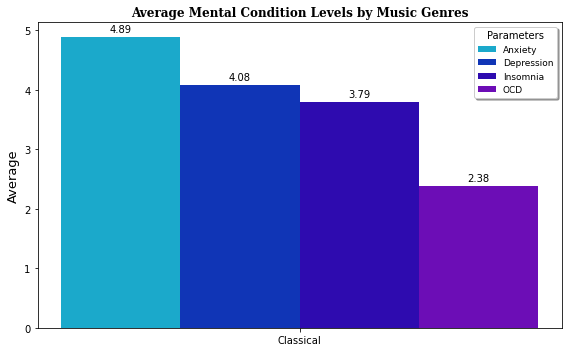

In [48]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:
labels = ['Clasical']
anx_mean = classical_means["Anxiety"]
dep_mean = classical_means["Depression"]
ins_mean = classical_means["Insomnia"]
ocd_mean = classical_means["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels by Music Genres', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Classical'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.savefig('Output/classical_bar.png')
plt.show()

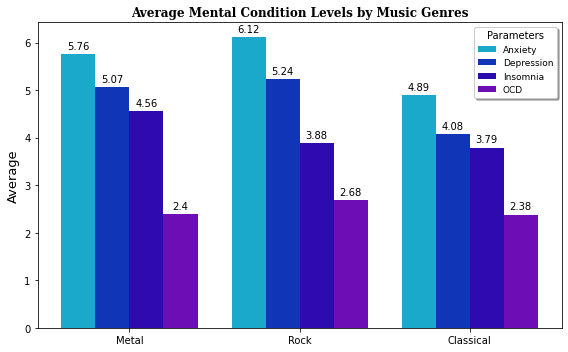

In [49]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:
labels = ['Metal', 'Rock', 'Classical']
anx_mean = [5.76, 6.12, 4.89]
dep_mean = [5.07, 5.24, 4.08]
ins_mean = [4.56, 3.88, 3.79]
ocd_mean = [2.40, 2.68, 2.38]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels by Music Genres', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Metal', 'Rock', 'Classical'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotting:
plt.tight_layout()
plt.savefig('Output/combined_bar.png')
plt.show()

In [50]:
# Creating the dataset and viewing a sample:
working_data = (
    mental_health_data_df
    .query('`While working` == "Yes"')
)

working_data.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
311,8/29/2022 4:37:05,22.0,Spotify,2.0,Yes,EDM,Yes,120.0,Rarely,Sometimes,...,Sometimes,Sometimes,Very frequently,Sometimes,Very frequently,6.0,4.0,0.0,1.0,Improve
571,9/4/2022 20:38:17,29.0,Spotify,4.0,Yes,Classical,Yes,120.0,Very frequently,Never,...,Sometimes,Never,Never,Rarely,Rarely,5.0,6.0,7.0,7.0,No effect
617,9/12/2022 12:46:55,17.0,Spotify,3.0,Yes,Rock,Yes,120.0,Sometimes,Sometimes,...,Very frequently,Never,Rarely,Very frequently,Never,1.0,5.0,6.0,4.0,No effect
152,8/28/2022 18:35:17,21.0,I do not use a streaming service.,3.0,Yes,Rock,No,77.0,Never,Never,...,Rarely,Rarely,Sometimes,Very frequently,Very frequently,9.0,10.0,3.0,0.0,No effect
720,10/9/2022 22:15:59,17.0,Spotify,5.0,Yes,Hip hop,Yes,168.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Rarely,Rarely,7.0,7.0,5.0,5.0,Improve
583,9/6/2022 11:19:55,30.0,Spotify,8.0,Yes,Rock,Yes,112.0,Sometimes,Sometimes,...,Sometimes,Sometimes,Sometimes,Very frequently,Never,8.0,6.0,6.0,8.0,Improve
118,8/28/2022 16:34:03,17.0,Spotify,3.0,Yes,Rock,Yes,130.0,Rarely,Sometimes,...,Very frequently,Very frequently,Sometimes,Very frequently,Sometimes,7.0,8.0,6.0,5.0,Improve
625,9/12/2022 14:42:44,19.0,Spotify,3.0,Yes,Rap,No,115.0,Never,Never,...,Very frequently,Sometimes,Very frequently,Sometimes,Sometimes,7.0,5.0,3.0,3.0,Improve
255,8/28/2022 23:56:06,17.0,I do not use a streaming service.,0.5,Yes,Video game music,No,136.0,Rarely,Sometimes,...,Sometimes,Rarely,Rarely,Sometimes,Very frequently,6.0,3.0,1.0,1.0,Improve
690,9/24/2022 10:59:12,19.0,Spotify,3.0,Yes,Hip hop,Yes,115.0,Sometimes,Never,...,Very frequently,Very frequently,Very frequently,Never,Rarely,3.0,8.0,0.0,2.0,Improve


In [51]:
genre_ages_working = (working_data.groupby('Age')['While working'].agg(['value_counts']).reset_index()
              .rename(columns={'value_counts':'quantity'}))

genre_ages_working.sample(12)

,Age,While working,quantity
27,38.0,Yes,4
37,53.0,Yes,2
41,57.0,Yes,2
21,32.0,Yes,12
46,63.0,Yes,3
48,65.0,Yes,1
7,18.0,Yes,68
54,72.0,Yes,1
35,49.0,Yes,3
24,35.0,Yes,4


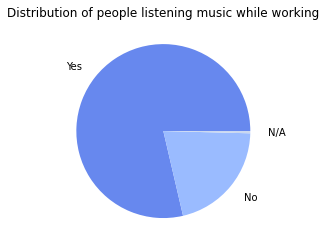

In [52]:
genre_ages_working_count = mental_health_data_df["While working"].value_counts()

genre_ages_working_count.plot(kind='pie', labeldistance = 1.2, colors = sns.color_palette("coolwarm"))

plt.title('Distribution of people listening music while working')
plt.ylabel("")
plt.savefig('Output/While_working_pie.png')
plt.show()

In [53]:
mean_age_working = (working_data.groupby('Fav genre', as_index=False)[['Age']]
                    .mean()
                    .round())

mean_age_working

,Fav genre,Age
0,Classical,26.0
1,Country,24.0
2,EDM,22.0
3,Folk,25.0
4,Gospel,55.0
5,Hip hop,24.0
6,Jazz,24.0
7,K pop,18.0
8,Latin,18.0
9,Lofi,22.0


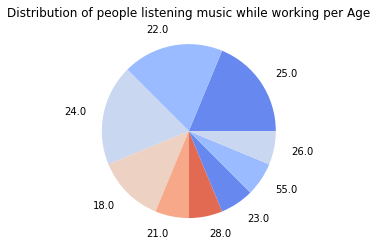

In [54]:
genre_ages_working_mean = mean_age_working["Age"].value_counts()

genre_ages_working_mean .plot(kind='pie', labeldistance = 1.2, colors = sns.color_palette("coolwarm"))

plt.title('Distribution of people listening music while working per Age')
plt.ylabel("")
plt.savefig('Output/age_pie.png')

In [55]:
# Creating the dataset and viewing a sample:
working_data_yes = (
    mental_health_data_df
    .query('`While working` == "Yes"')
)

working_data_yes.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
391,8/29/2022 18:57:09,18.0,Spotify,5.0,Yes,K pop,Yes,124.0,Never,Rarely,...,Very frequently,Rarely,Sometimes,Sometimes,Never,7.0,4.0,5.0,6.0,Improve
623,9/12/2022 14:27:43,28.0,Spotify,4.0,Yes,Hip hop,Yes,178.0,Rarely,Sometimes,...,Very frequently,Rarely,Very frequently,Sometimes,Rarely,8.0,5.0,3.0,8.0,Improve
177,8/28/2022 19:30:49,18.0,YouTube Music,1.5,Yes,Pop,Yes,-1.0,Never,Rarely,...,Very frequently,Sometimes,Rarely,Rarely,Very frequently,8.0,6.0,5.0,2.0,Improve
328,8/29/2022 6:13:47,23.0,Spotify,5.0,Yes,Video game music,No,95.0,Sometimes,Never,...,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,8.0,7.0,0.0,3.0,No effect
225,8/28/2022 22:10:24,17.0,Spotify,2.0,Yes,Pop,Yes,160.0,Rarely,Rarely,...,Very frequently,Rarely,Sometimes,Sometimes,Never,5.0,4.0,1.0,1.0,Improve
26,8/28/2022 4:40:36,14.0,Spotify,12.0,Yes,Rock,Yes,136.0,Sometimes,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Sometimes,8.0,6.0,10.0,5.0,Improve
35,8/28/2022 11:13:25,18.0,Spotify,5.0,Yes,Pop,Yes,120.0,Sometimes,Rarely,...,Very frequently,Sometimes,Sometimes,Rarely,Never,3.0,2.0,1.0,1.0,Improve
306,8/29/2022 4:02:01,17.0,Spotify,2.0,Yes,Pop,Yes,76.0,Sometimes,Never,...,Very frequently,Rarely,Rarely,Never,Rarely,7.0,6.0,0.0,4.0,Improve
325,8/29/2022 5:45:03,22.0,Spotify,2.0,Yes,Pop,Yes,72.0,Rarely,Rarely,...,Very frequently,Very frequently,Sometimes,Sometimes,Rarely,2.0,7.0,1.0,2.0,Improve
454,9/1/2022 13:14:34,24.0,Spotify,6.0,Yes,Video game music,No,180.0,Sometimes,Never,...,Rarely,Never,Never,Very frequently,Very frequently,9.0,5.0,0.0,7.0,Improve


In [56]:
genre_ages_working = (working_data_yes.groupby('Age')['While working'].agg(['value_counts']).reset_index()
              .rename(columns={'value_counts':'quantity'}))

genre_ages_working.sample(12)

,Age,While working,quantity
12,23.0,Yes,28
33,44.0,Yes,1
23,34.0,Yes,3
49,67.0,Yes,1
52,70.0,Yes,1
36,51.0,Yes,1
21,32.0,Yes,12
0,10.0,Yes,1
31,42.0,Yes,3
30,41.0,Yes,3


In [57]:
mean_age_working = (working_data_yes.groupby('Fav genre', as_index=False)[['Age']]
                    .mean()
                    .round())

mean_age_working

,Fav genre,Age
0,Classical,26.0
1,Country,24.0
2,EDM,22.0
3,Folk,25.0
4,Gospel,55.0
5,Hip hop,24.0
6,Jazz,24.0
7,K pop,18.0
8,Latin,18.0
9,Lofi,22.0


In [58]:
# Grouping data to get mental conditions averages:
working_means_yes = (
       working_data_yes
       .groupby('While working')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round()
)

working_means_yes 

,Anxiety,Depression,Insomnia,OCD
While working,,,,
Yes,6.0,5.0,4.0,3.0


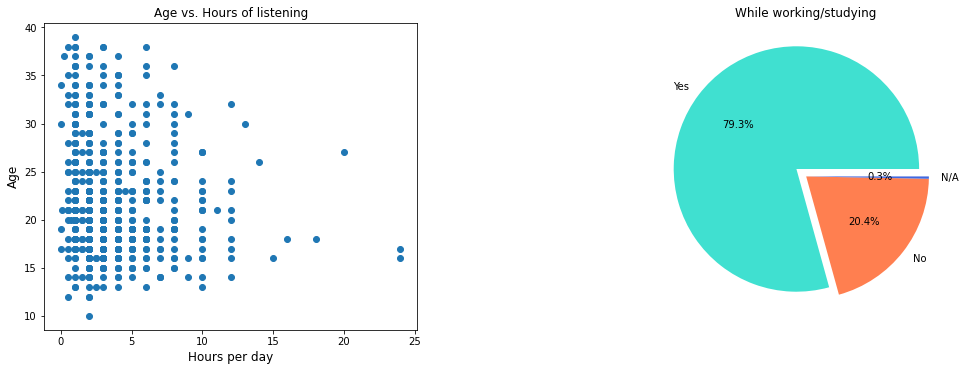

In [59]:
x = mental_health_data_df_40_under["Hours per day"]
y = mental_health_data_df_40_under["Age"]
z= mental_health_data_df_40_under["While working"].value_counts()

fig,(ax1, ax2) = plt.subplots(1,2)
fig.tight_layout(w_pad =5)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.scatter(x,y)
ax1.set_xlabel('Hours per day', fontsize =12)
ax1.set_ylabel('Age', fontsize =12)
ax1.set_title('Age vs. Hours of listening', fontsize =12)

labels=mental_health_data_df_40_under["While working"].unique()
ax2.pie(z, labels = labels, explode = [0.1,0,0], autopct='%.1f%%', colors=["turquoise", "coral","royalblue"])
ax2.title.set_text('While working/studying')
plt.savefig('Output/while_working_yes.png')
plt.show()

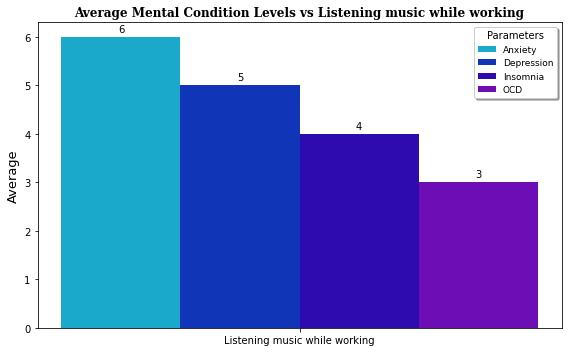

In [60]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:

labels = ['While working` == "Yes"']
anx_mean = working_means_yes["Anxiety"]
dep_mean = working_means_yes["Depression"]
ins_mean = working_means_yes["Insomnia"]
ocd_mean = working_means_yes["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels vs Listening music while working', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Listening music while working'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)

# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)
# Plotting:
plt.tight_layout()
plt.savefig('Output/while_working_bar.png')
plt.show()

In [61]:
# Creating the dataset and viewing a sample:
working_data_no = (
    mental_health_data_df
    .query('`While working` == "No"')
)

working_data_no.sample(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
528,9/2/2022 14:31:06,22.0,I do not use a streaming service.,4.0,No,Pop,Yes,-1.0,Rarely,Sometimes,...,Very frequently,Very frequently,Rarely,Sometimes,Never,8.0,7.0,4.0,4.0,Improve
505,9/2/2022 2:19:59,25.0,Spotify,4.0,No,Video game music,Yes,134.0,Sometimes,Never,...,Very frequently,Sometimes,Never,Never,Very frequently,3.0,0.0,0.0,0.0,Improve
133,8/28/2022 17:41:15,32.0,Other streaming service,1.0,No,EDM,Yes,120.0,Rarely,Never,...,Sometimes,Rarely,Rarely,Rarely,Never,3.0,6.0,2.0,0.0,No effect
469,9/1/2022 16:30:33,41.0,Spotify,3.0,No,Metal,Yes,178.0,Very frequently,Rarely,...,Rarely,Never,Rarely,Sometimes,Very frequently,6.0,5.0,4.0,0.0,No effect
360,8/29/2022 11:04:24,20.0,I do not use a streaming service.,0.5,No,Metal,Yes,150.0,Sometimes,Rarely,...,Rarely,Rarely,Rarely,Sometimes,Sometimes,8.0,9.0,6.0,4.0,Improve
125,8/28/2022 17:15:18,22.0,Spotify,10.0,No,EDM,No,128.0,Sometimes,Sometimes,...,Never,Rarely,Never,Sometimes,Sometimes,4.0,7.0,7.0,3.0,Improve
179,8/28/2022 19:40:03,38.0,Spotify,0.5,No,Rock,Yes,-1.0,Never,Never,...,Very frequently,Sometimes,Rarely,Very frequently,Never,4.0,6.0,6.0,4.0,Improve
120,8/28/2022 16:37:10,23.0,Spotify,2.0,No,Rock,Yes,-1.0,Never,Never,...,Very frequently,Never,Sometimes,Very frequently,Sometimes,7.0,8.0,5.0,1.0,No effect
511,9/2/2022 4:56:02,43.0,Other streaming service,1.0,No,Country,No,110.0,Never,Very frequently,...,Sometimes,Never,Never,Rarely,Never,5.0,1.0,1.0,1.0,Improve
396,8/29/2022 20:03:04,14.0,YouTube Music,1.5,No,Classical,Yes,140.0,Very frequently,Never,...,Never,Never,Never,Rarely,Sometimes,1.0,2.0,4.0,3.0,Improve


In [62]:
# Grouping data to get mental conditions averages:
working_means_no = (
       working_data_no
       .groupby('While working')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round(2)
)

working_means_no

,Anxiety,Depression,Insomnia,OCD
While working,,,,
No,5.62,4.47,3.52,2.18


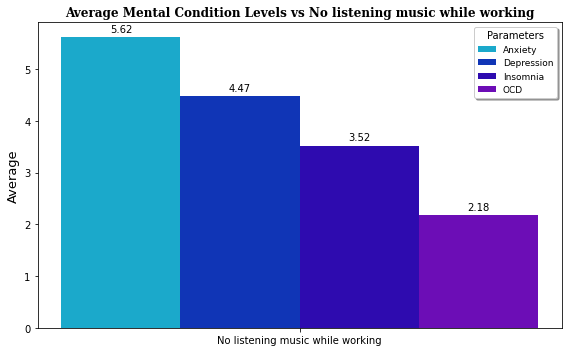

In [63]:
fig, ax = plt.subplots(figsize=(8,5))

# Defining bar labels and values:

labels = ['While working` == "No"']
anx_mean = working_means_no["Anxiety"]
dep_mean = working_means_no["Depression"]
ins_mean = working_means_no["Insomnia"]
ocd_mean = working_means_no["OCD"]

# Defining the position of the labels and width of the bars:
label_loc = np.arange(len(labels))
width = 0.20

# Plotting the individual bars:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Anxiety', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depression', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insomnia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='OCD', color='#6C0DB6')

# Styling labels and title:
plt.ylabel('Average', fontsize=13)

plt.title(
    'Average Mental Condition Levels vs No listening music while working', 
    fontdict={'size': 12, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['No listening music while working'])
plt.legend(
    fontsize=9, 
    fancybox=True, 
    shadow=True, 
    title='Parameters'
)
# Adjusting the position of the bar value labels:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)
# Plotting:
plt.tight_layout()
plt.savefig('Output/while_working_no.png')
plt.show()